# UTS Pembelajaran Mesin

Nama  : Raihan Adam<br>
NIM : 1197050109<br>
Kelas : Teori-B<br>
Dataset : [Customer Personality Analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)<br>
Algoritma : K-Means<br>
Alasan  : Saya melakukan analisis data set ini untuk mengetahui produktivitas seseorang berdasarkan umur yang memengaruhi pendapatan, karena struktur umur akan berpengaruh terhadap kegiatan ekonomi yang dilakukan oleh yang bersangkutan sesuai dengan kemampuannya.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

df = pd.read_csv('marketing_campaign.csv', header=0, sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [2]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [3]:
# Menghapus/membuang kolom yang tidak diperlukan
df = df.drop(["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "Kidhome", "Teenhome", "Complain", "Recency", "Dt_Customer", "Z_CostContact", "Z_Revenue", "NumDealsPurchases", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"], axis=1)

In [4]:
# Menghitung data yang kosong kolom "Income"
df.Income.isnull().sum()

24

In [5]:
# Mengisi data yang kosong dengan 0
df.Income.fillna(0, inplace=True)
df.Income.isnull().sum()

0

In [6]:
# Menghitung umur dari pengurangan tahun sekarang dan tahun lahir dari beberapa data
age = datetime.datetime.now().year - df.Year_Birth
df['Age'] = age

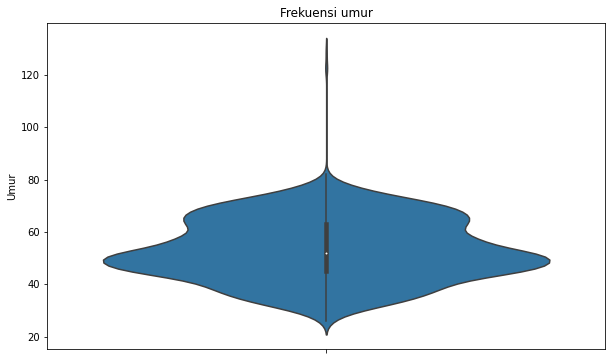

In [7]:
# Frekuensi umur
plt.figure(figsize=(10,6))
plt.title("Frekuensi umur")
sns.axes_style("dark")
sns.violinplot(y=age)
plt.ylabel("Umur")
plt.show()

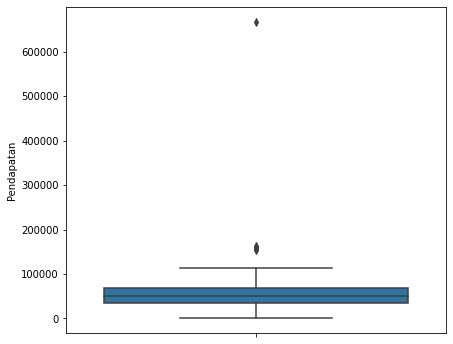

In [8]:
# Frekuensi pendapatan
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df.Income)
plt.ylabel('Pendapatan')
plt.show()

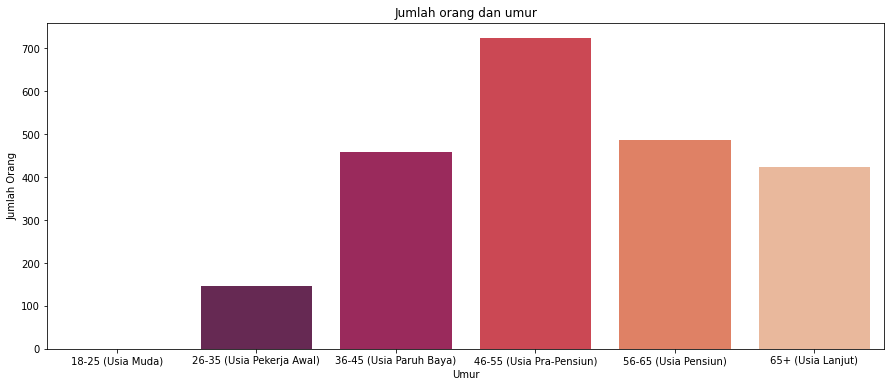

In [9]:
# Pembagian kelompok usia; rujukan: https://sepakat.bappenas.go.id/wiki/Kelompok_Usia
age18_25 = age[(age <= 25) & (age >= 18)] # Usia Muda
age26_35 = age[(age <= 35) & (age >= 26)] # Usia Pekerja Awal
age36_45 = age[(age <= 45) & (age >= 36)] # Usia Paruh Baya
age46_55 = age[(age <= 55) & (age >= 46)] # Usia Pra-Pensiun
age56_65 = age[(age <= 65) & (age >= 56)] # Usia Pensiun
age65above = age[age >= 66] # Usia Lanjut

x = ["18-25 (Usia Muda)","26-35 (Usia Pekerja Awal)","36-45 (Usia Paruh Baya)","46-55 (Usia Pra-Pensiun)","56-65 (Usia Pensiun)","65+ (Usia Lanjut)"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age56_65.values),len(age65above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Jumlah orang dan umur")
plt.xlabel("Umur")
plt.ylabel("Jumlah Orang")
plt.show()

In [10]:
# Menambah kolom rata-rata umur (AvgAge)

# 0 = Usia Muda (18-25)
# 1 = Usia Pekerja Awal (26-35)
# 2 = Usia Paruh Baya (36-45)
# 3 = Usia Pra-Pensiun (46-55)
# 4 = Usia Pensiun (56-65)
# 5 = Usia Lanjut >65
condition_str = ["Usia Muda (18-25)", "Usia Pekerja Awal (26-35)", "Usia Paruh Baya (36-45)", "Usia Pra-Pensiun (46-55)", "Usia Pensiun (56-65)", "Usia Lanjut >65"]
condition = [0, 1, 2, 3, 4, 5]
choices = [(age <= 25) & (age >= 18), (age <= 35) & (age >= 26), (age <= 45) & (age >= 36), (age <= 55) & (age >= 46), (age <= 65) & (age >= 56), age >= 66]
df["AvgAge"] = np.select(choices, condition_str)
df

,ID,Year_Birth,Education,Marital_Status,Income,Age,AvgAge
0,5524,1957,Graduation,Single,58138.0,65,Usia Pensiun (56-65)
1,2174,1954,Graduation,Single,46344.0,68,Usia Lanjut >65
2,4141,1965,Graduation,Together,71613.0,57,Usia Pensiun (56-65)
3,6182,1984,Graduation,Together,26646.0,38,Usia Paruh Baya (36-45)
4,5324,1981,PhD,Married,58293.0,41,Usia Paruh Baya (36-45)
...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,55,Usia Pra-Pensiun (46-55)
2236,4001,1946,PhD,Together,64014.0,76,Usia Lanjut >65
2237,7270,1981,Graduation,Divorced,56981.0,41,Usia Paruh Baya (36-45)
2238,8235,1956,Master,Together,69245.0,66,Usia Lanjut >65


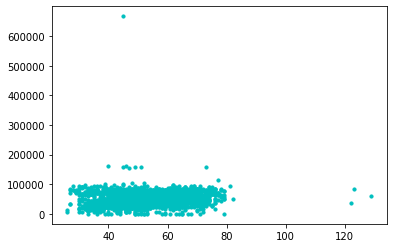

In [11]:
# Visualisasi persebaran data
plt.scatter(df.Age, df.Income, s =10, c = "c", marker = "o", alpha = 1)
plt.show()

[1468422577618.8281, 702544626142.5215, 347033966146.21704, 201384549330.58655, 134346647962.19096, 92204320600.70883]


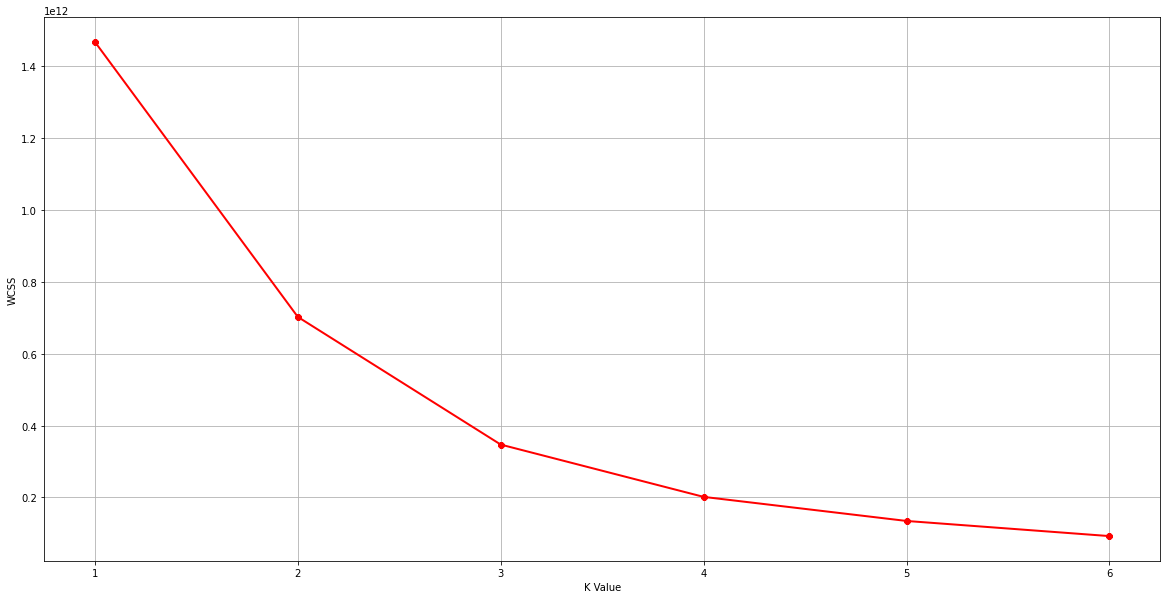

In [12]:
# Menentukan banyak cluster yang akan dipakai pada k-means
from sklearn.cluster import KMeans

wcss = []
for k in range(1,7):
  kmeans = KMeans(n_clusters=k, init="k-means++")
  kmeans.fit(df.iloc[:,4:6])
  wcss.append(kmeans.inertia_)
print(wcss)
plt.figure(figsize=(20,10))    
plt.grid()
plt.plot(range(1,7), wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,7,1))
plt.ylabel("WCSS")
plt.show()

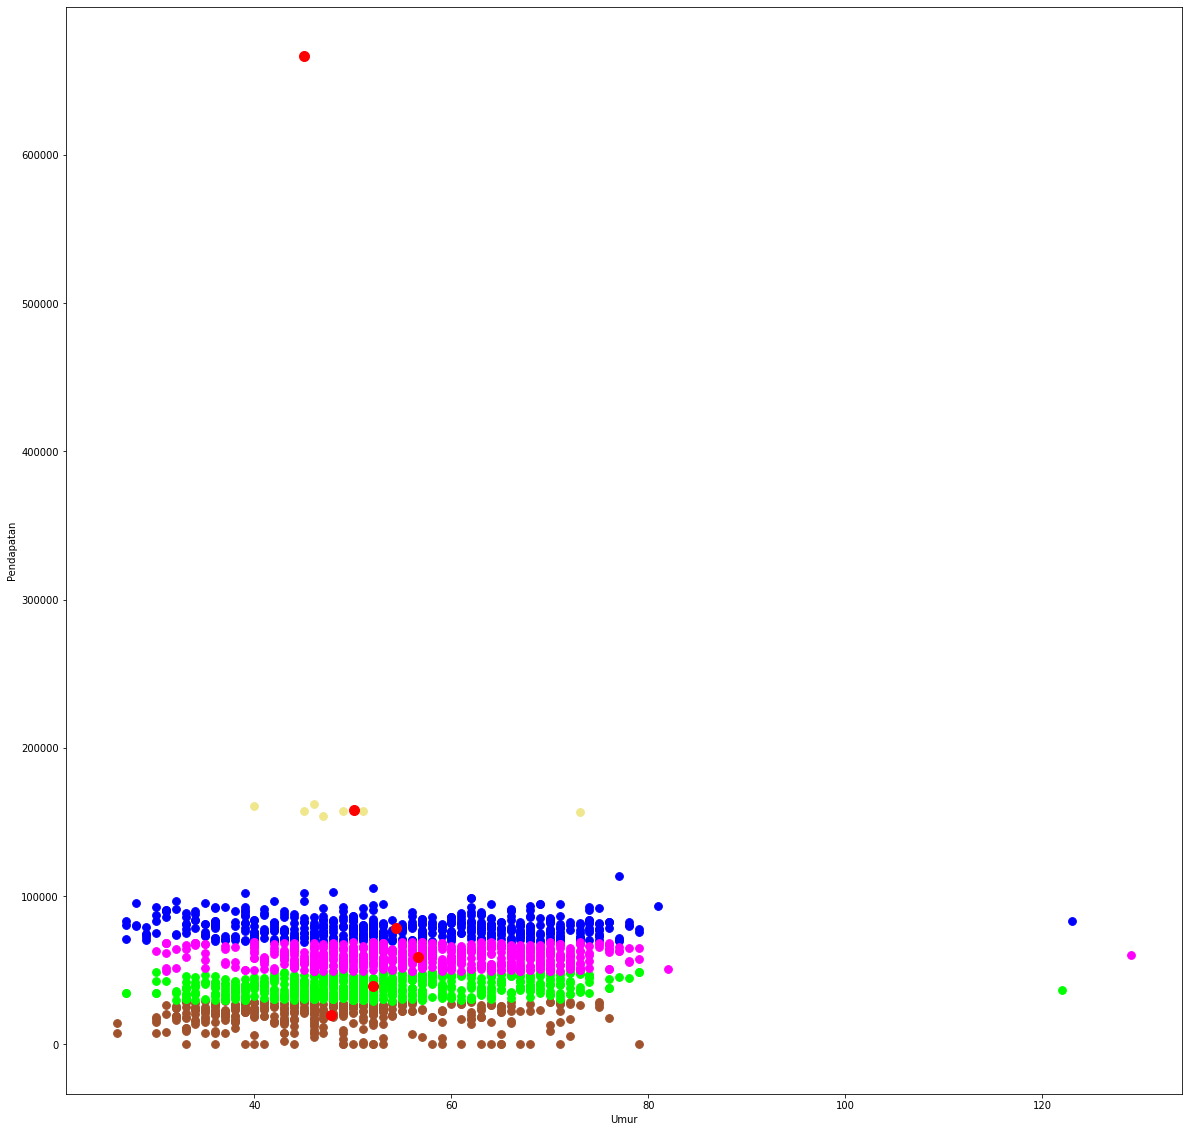

In [13]:
# Visualisasi hasil kluster
km = KMeans(n_clusters=6)
clusters = km.fit_predict(df.iloc[:,4:6])
df["label"] = clusters
ageavg = [age18_25, age26_35, age36_45, age46_55, age56_65, age65above]
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
ax.scatter(df.Age[df.label == 0], df.Income[df.label == 0], c='sienna', s=60)
ax.scatter(df.Age[df.label == 1], df.Income[df.label == 1], c='lime', s=60)
ax.scatter(df.Age[df.label == 2], df.Income[df.label == 2], c='blue', s=60)
ax.scatter(df.Age[df.label == 3], df.Income[df.label == 3], c='khaki', s=60)
ax.scatter(df.Age[df.label == 4], df.Income[df.label == 4], c='magenta', s=60)
ax.scatter(df.Age[df.label == 5], df.Income[df.label == 5], c='navy', s=60)

# ax.scatter(df.Income[df.label == 0], df.Age[df.label == 0], c='lightgreen', s=60)
# ax.scatter(df.Income[df.label == 1], df.Age[df.label == 1], c='lime', s=60)
# ax.scatter(df.Income[df.label == 2], df.Age[df.label == 2], c='blue', s=60)
# ax.scatter(df.Income[df.label == 3], df.Age[df.label == 3], c='navy', s=60)
# ax.scatter(df.Income[df.label == 4], df.Age[df.label == 4], c='magenta', s=60)

centers = kmeans.cluster_centers_
ax.scatter(centers[:,1], centers[:,0], c='red', s=100, alpha=1)

plt.xlabel("Umur")
plt.ylabel("Pendapatan")
plt.show()


Kesimpulan<br>
- Pada label ke-0 rata-rata data memiliki penghasilan kurang dari 1/4 dari 10000 dan berada di umur lebih dari 40 tahun dan kurang dari 60 tahun
- Pada label ke-1 rata-rata data memiliki penghasilan kurang dari 2/4 dari 10000 dan berada di umur lebih dari 40 tahun dan kurang dari 60 tahun
- Pada label ke-2 rata-rata data memiliki penghasilan lebih dari 3/4 dari 10000 dan kurang dari 10000 dan berada di umur lebih dari 40 tahun dan kurang dari 60 tahun
- Pada label ke-3 rata-rata data memiliki penghasilan lebih dari 10000 dan kurang dari 20000 dan berada di umur lebih dari 40 tahun dan kurang dari 60 tahun
- Pada label ke-4 rata-rata data memiliki penghasilan kurang dari 3/4 dari 10000 dan lebih dari 2/4 dari 10000 dan kurang dari 10000 dan berada di umur lebih dari 40 tahun dan kurang dari 60 tahun
- Pada label ke-5 data memiliki penghasilan lebih dari 60000 dan berada di umur lebih dari 40 tahun dan kurang dari 60 tahun.
- Rata-rata usia produktif pada data berada di umur lebih dari 40 tahun dan kurang dari 60 tahun. 